# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Image Pre-Processing

In [2]:
def minmaxScaler_scal(x,Max=2,Min=1,types=None):
    x_std=((x-x.min())/ (x.max())- x.min())
    
    x=x_std * (Max- Min)+Min
    print(x)
    return x

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input , MobileNetV2
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            #rescale=1./255.0, # 0 : 1
            #preprocessing_function=minmaxScaler_scal,
            preprocessing_function=preprocess_input,
            rotation_range=10,
            horizontal_flip=True,
            vertical_flip=True,
            validation_split = 0.1
            )

In [4]:
train_generator = datagen.flow_from_directory(
            directory="../input/dataset/train",
            subset="training",
            batch_size=64,
            #color_mode='grayscale',
            seed=42,
            shuffle=True,
            class_mode="binary",
            target_size=(64,64))

Found 4452 images belonging to 2 classes.


In [5]:
list(train_generator.class_indices.keys())

['Normal', 'OSCC']

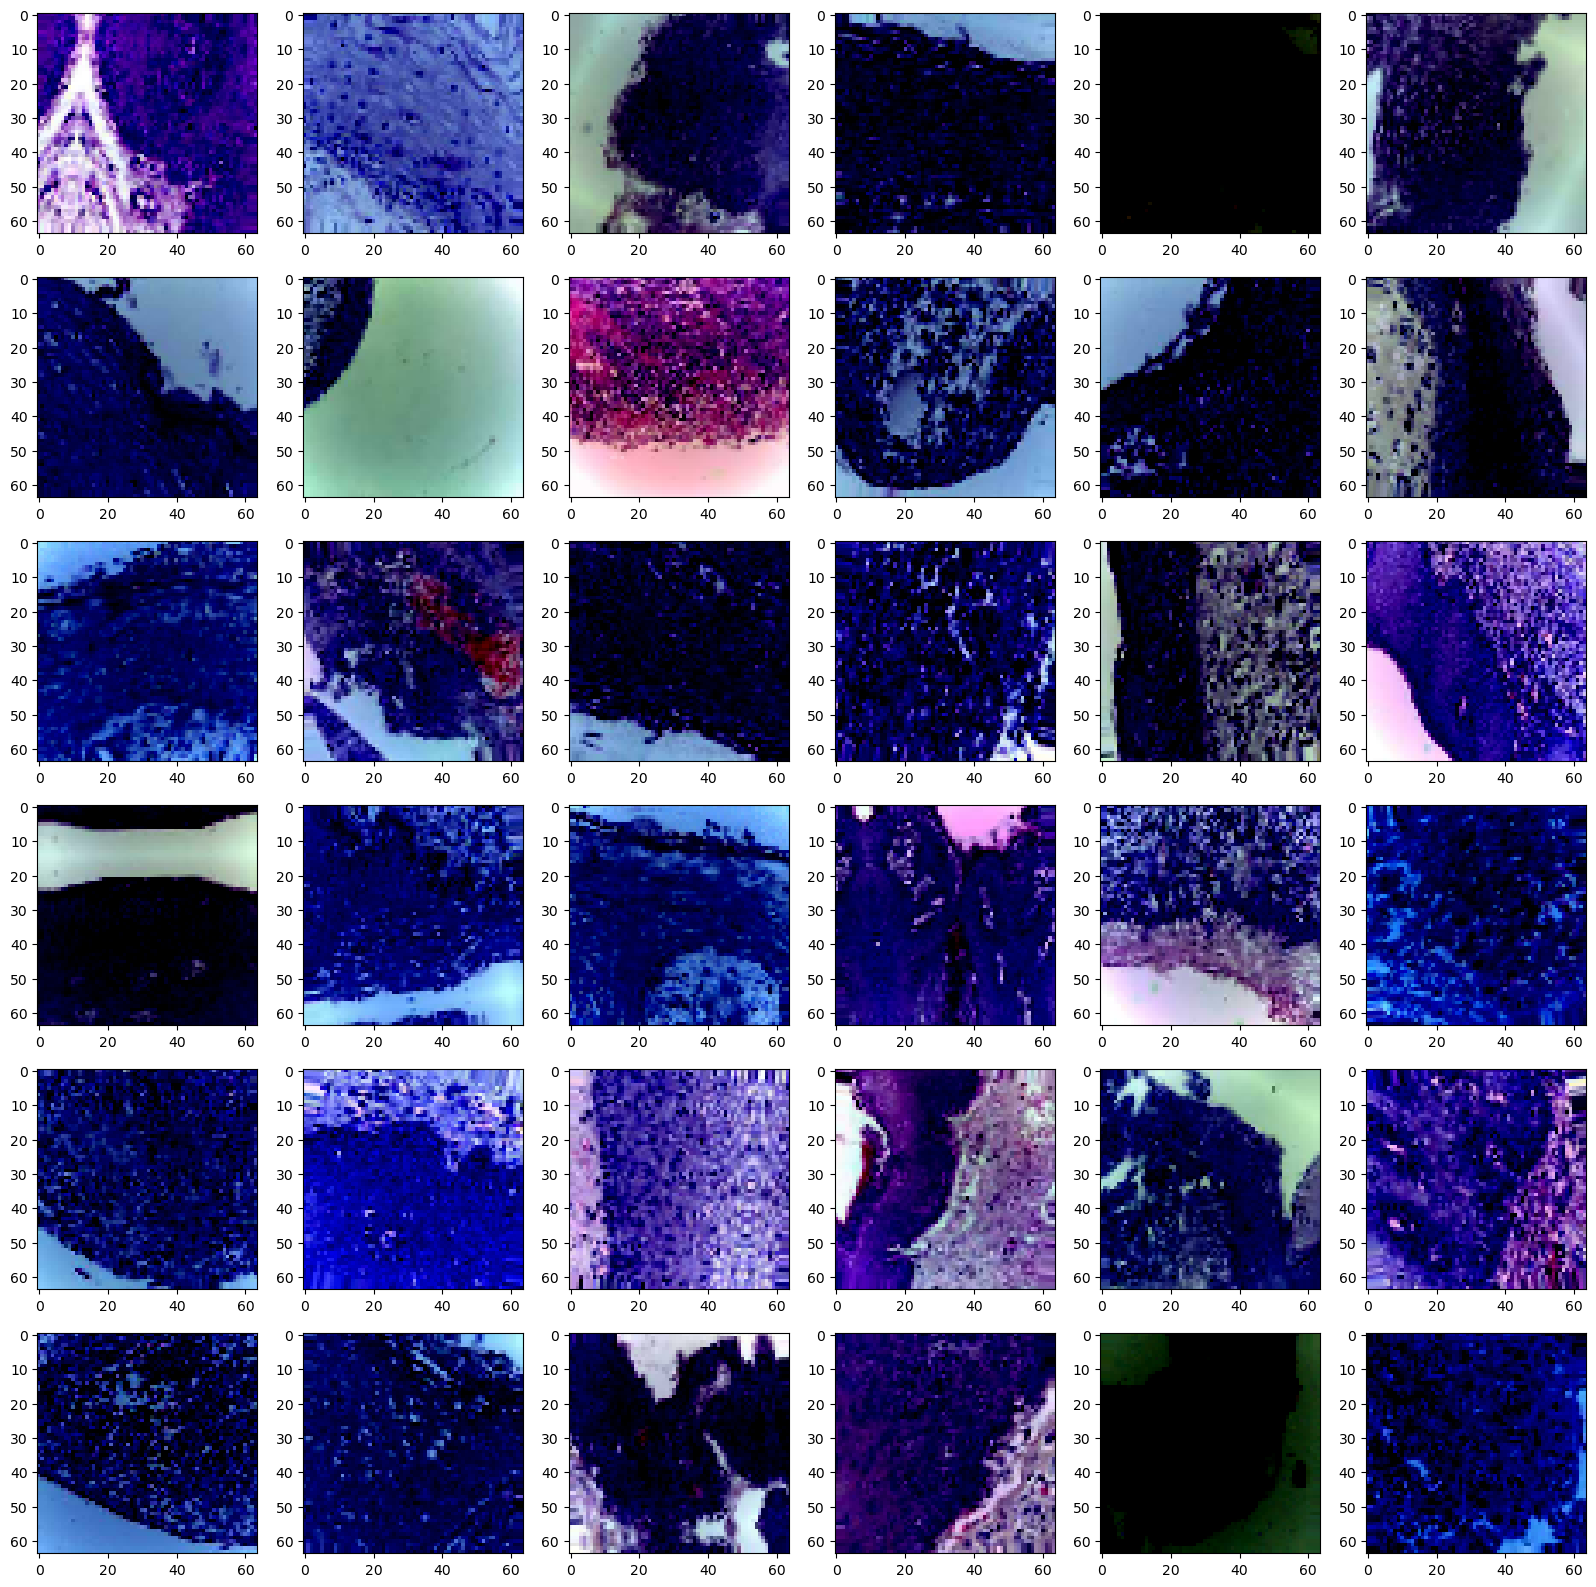

In [6]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,36):
        plt.subplot(6,6,i+1)
        plt.imshow(X_batch[i])
    # show the plot
    plt.show()
    break

In [7]:
datagen_valid = tf.keras.preprocessing.image.ImageDataGenerator(
            #rescale=1./255.,
            preprocessing_function=preprocess_input,
            validation_split = 0.1
            )

In [8]:
valid_generator = datagen_valid.flow_from_directory(
            directory="../input/dataset/train",
            subset="validation",
            batch_size=64,
            seed=42,
            shuffle=False,
            class_mode="binary",
            target_size=(64,64))

Found 494 images belonging to 2 classes.


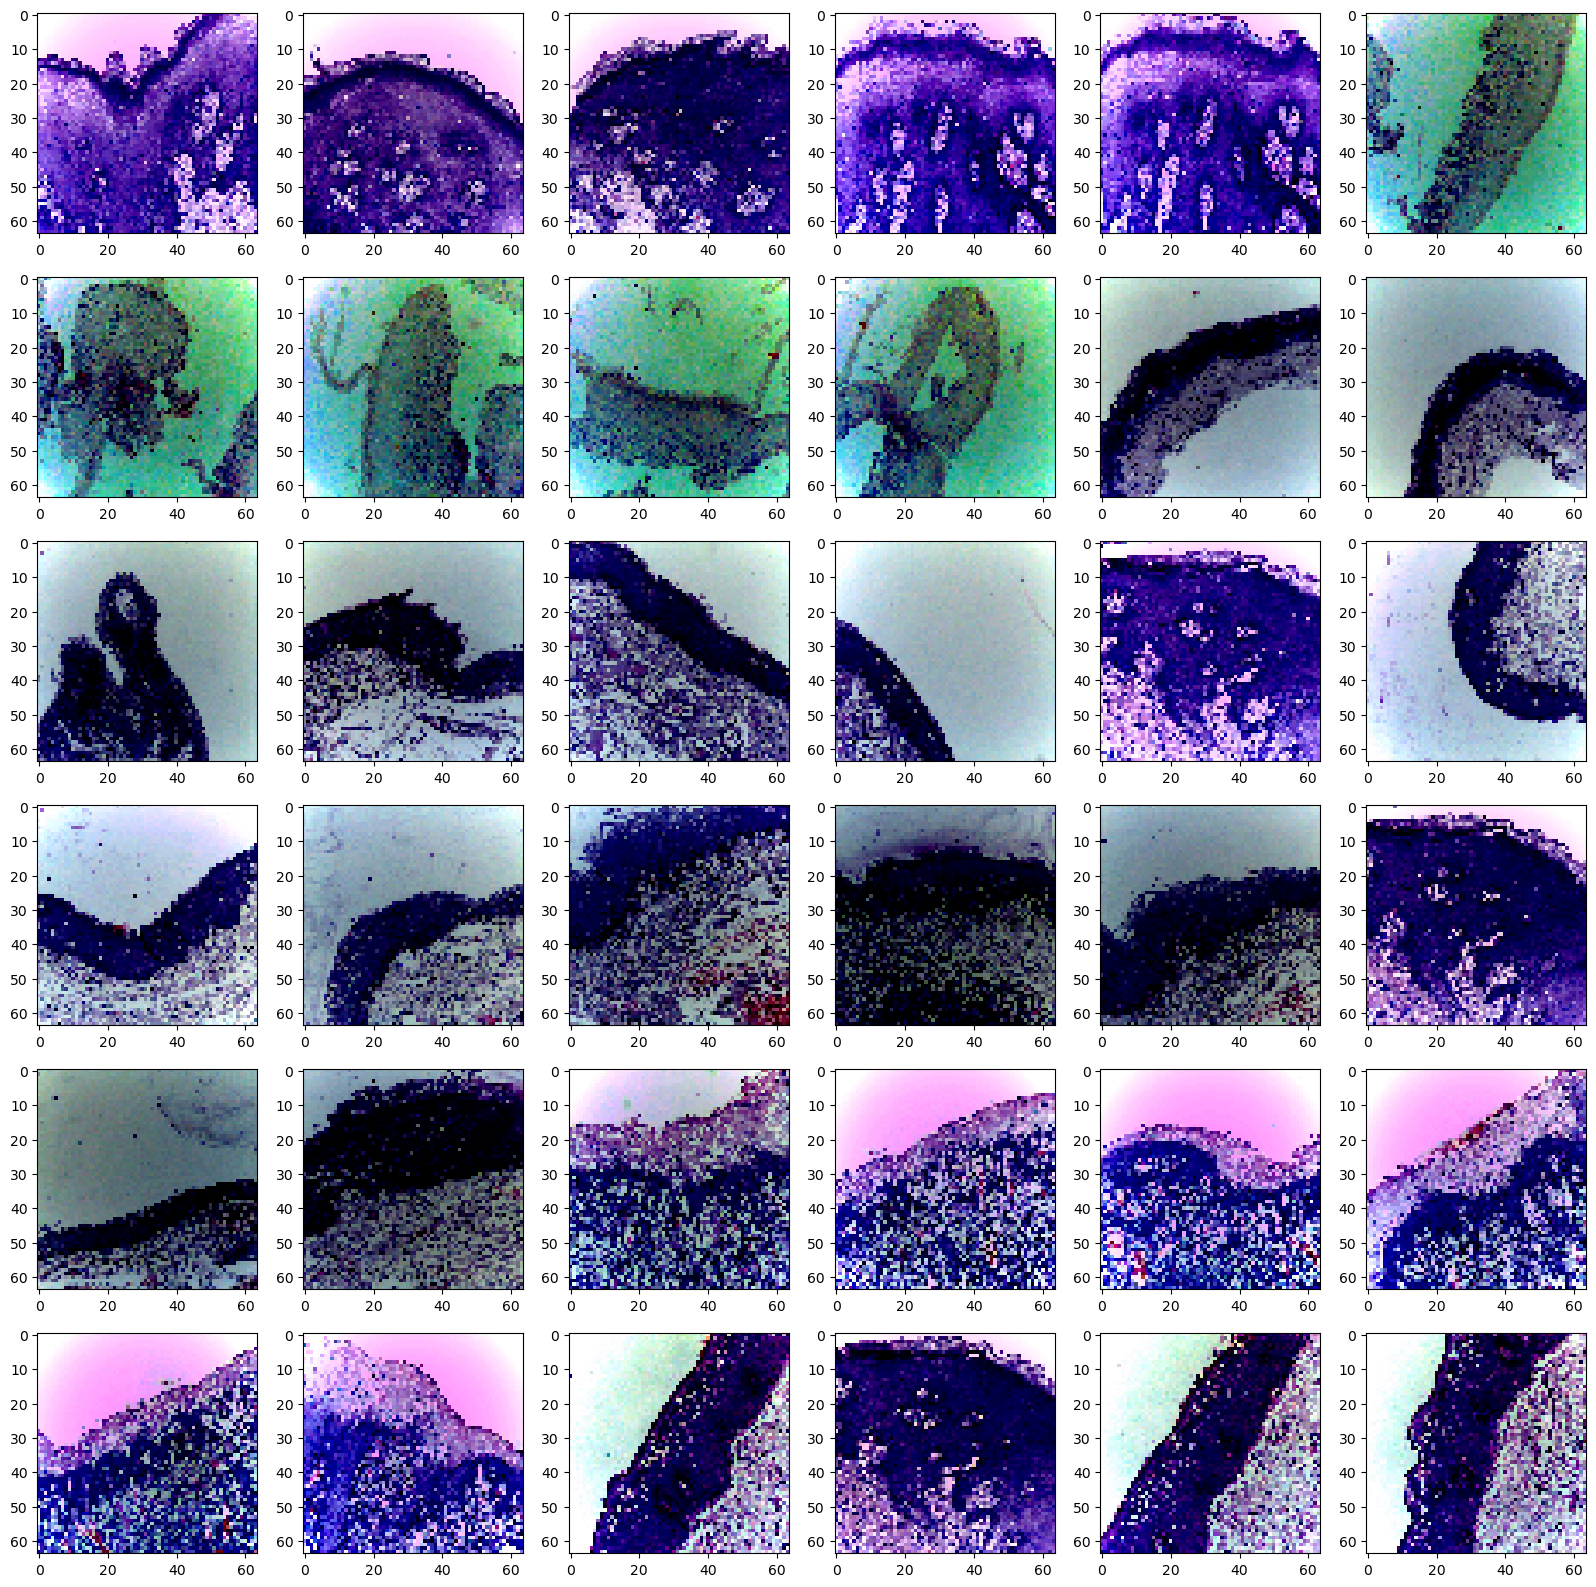

In [9]:
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,36):
        plt.subplot(6,6,i+1)
        plt.imshow(X_batch[i])
    # show the plot
    plt.show()
    break

In [10]:
datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(
            #rescale=1./255.
    preprocessing_function=preprocess_input,
            )

In [11]:
test_generator = datagen_test.flow_from_directory(
            directory="../input/dataset/test",
            batch_size=64,
            seed=42,
            shuffle=False,
            class_mode="binary",
            target_size=(64,64))

Found 126 images belonging to 2 classes.


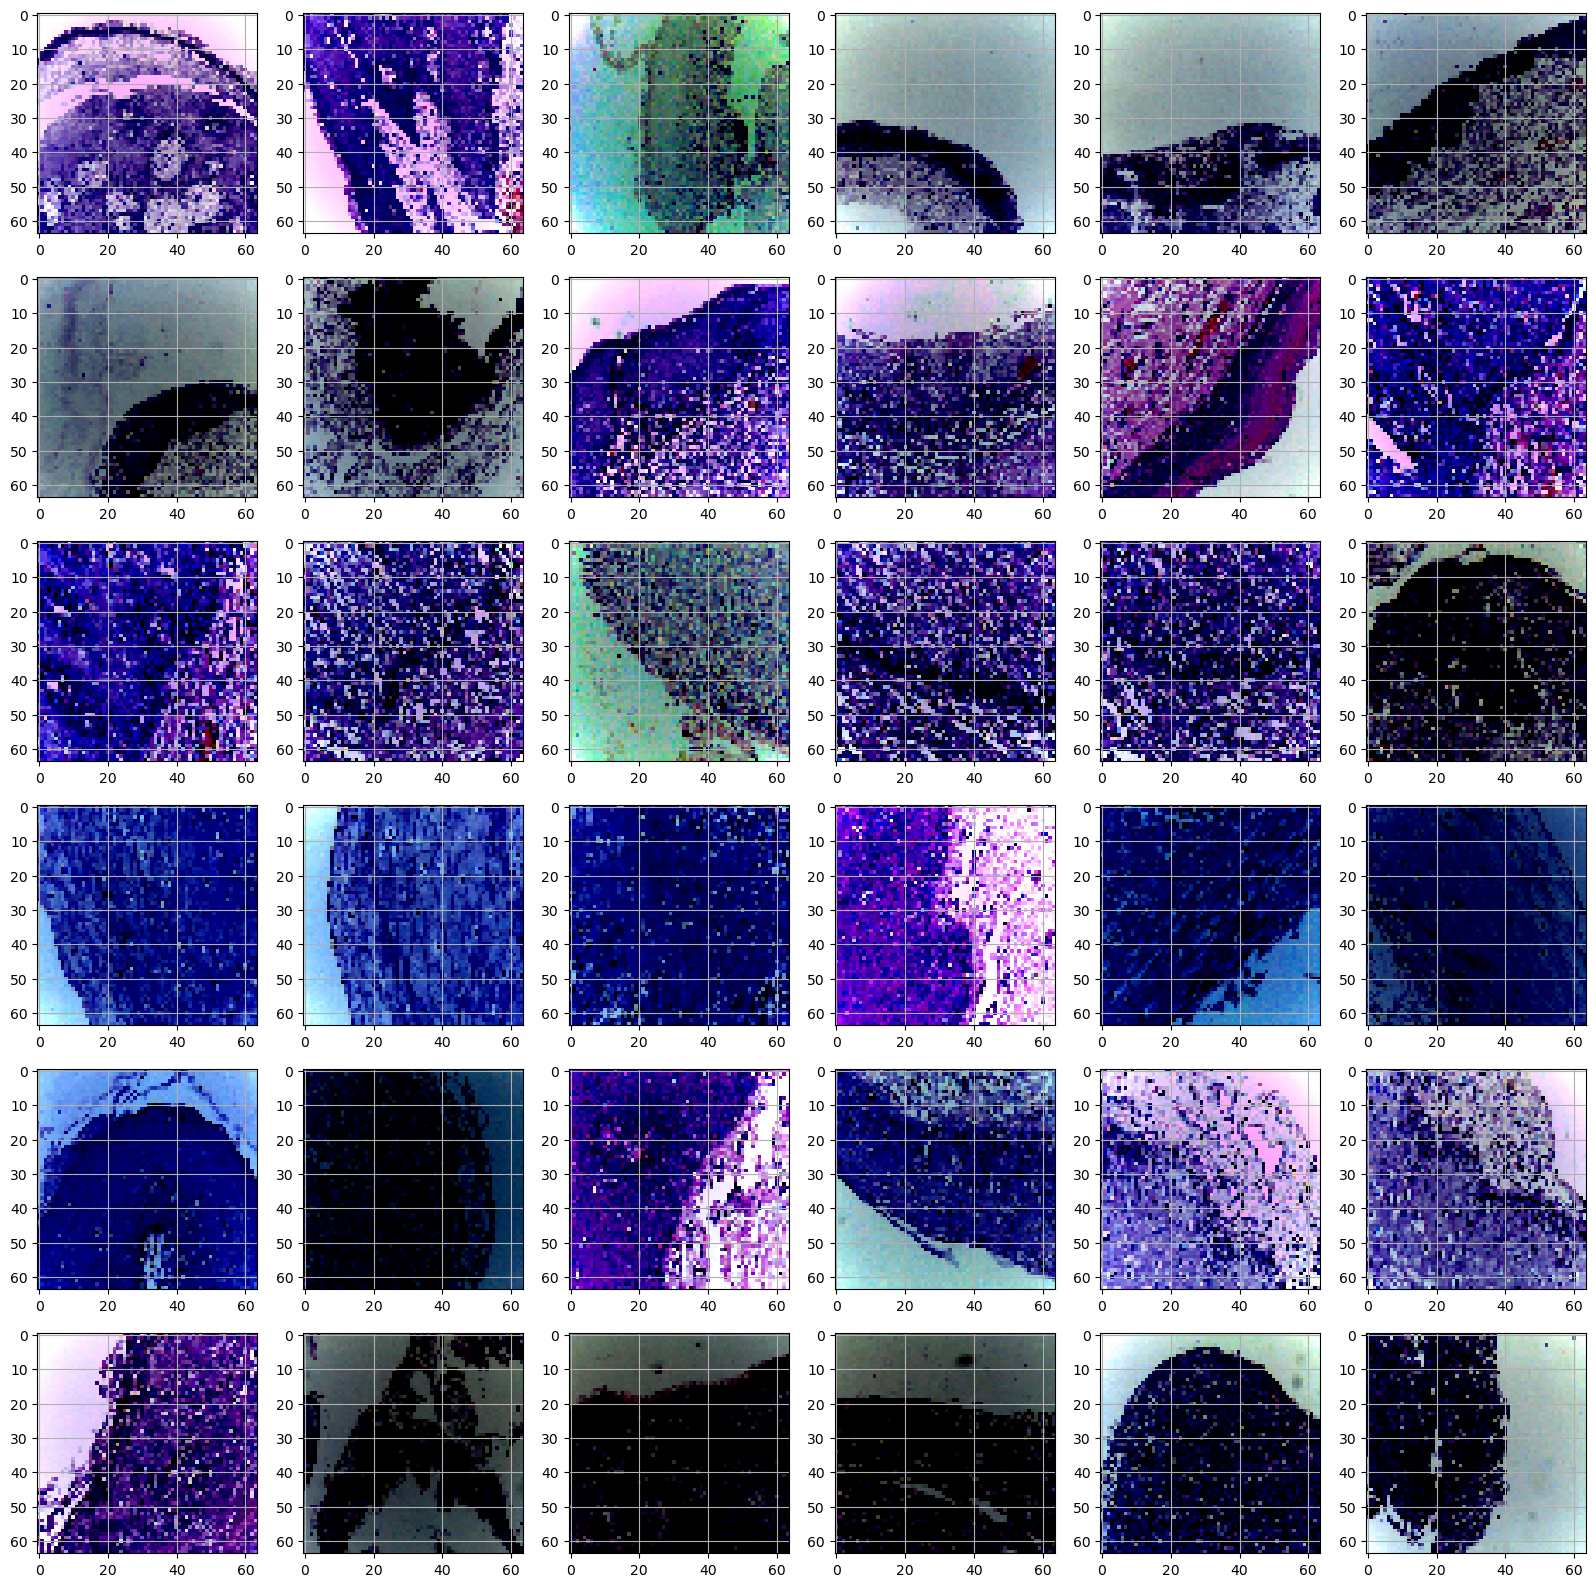

In [12]:
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,36):
        plt.subplot(6,6,i+1)
        plt.imshow(X_batch[i])
        plt.grid(visible=None)
    # show the plot
    plt.show()
    break

# Model Creation

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [14]:
#optimizer
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [15]:
#callbacks

# EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
# callback=[EarlyStop , Reduce_LR,model_check]

In [16]:
'''model=Sequential([
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal',input_shape=(64,64,3)),
                  BatchNormalization(),
                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),
                  BatchNormalization(),
                  MaxPooling2D(3),
                  Conv2D(256,3,activation='relu'),
                  BatchNormalization(),
                  MaxPooling2D(3),
                  Conv2D(512,3,padding='valid',activation='relu'),
                  BatchNormalization(),
                  GlobalMaxPool2D(),
                  Flatten(),
                  Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  BatchNormalization(),
                  Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  BatchNormalization(),
                  Dense(1,activation='sigmoid',kernel_initializer='glorot_normal')
                  
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])'''

"model=Sequential([\n                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal',input_shape=(64,64,3)),\n                  BatchNormalization(),\n                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal'),\n                  BatchNormalization(),\n                  MaxPooling2D(3),\n                  Conv2D(256,3,activation='relu'),\n                  BatchNormalization(),\n                  MaxPooling2D(3),\n                  Conv2D(512,3,padding='valid',activation='relu'),\n                  BatchNormalization(),\n                  GlobalMaxPool2D(),\n                  Flatten(),\n                  Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),\n                  BatchNormalization(),\n                  Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),\n                  BatchNormalization(),\n                  Dense(1,activation='sigmoid',kernel_initializer='glorot_normal')\

In [17]:
from tensorflow.keras.applications.inception_v3 import preprocess_input , InceptionV3

In [18]:
vgg=InceptionV3()

In [19]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input , MobileNetV2

In [20]:
Mb=MobileNetV2(include_top=False,weights='imagenet',input_shape=(64,64,3))

In [21]:
Mb.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 32, 32, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 32, 32, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 32, 32, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [22]:
Mb.trainable=False

# Model Compilation

In [23]:
model=Sequential([
                  Mb,
                  Flatten(),
                  Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  BatchNormalization(),
                  Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  BatchNormalization(),
                  Dense(1,activation='sigmoid',kernel_initializer='glorot_normal')
                  
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 2, 2, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 128)               655488    
                                                                 
 batch_normalization_94 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_95 (Bat  (None, 64)               2

# Model Training

In [25]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=10,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//8,
#                   callbacks=callback, 
                  verbose=1)


Epoch 1/10
4/4 [==============================] - 29s 7s/step - loss: 0.7852 - accuracy: 0.5898 - val_loss: 1.7535 - val_accuracy: 0.2031
Epoch 2/10
4/4 [==============================] - 18s 5s/step - loss: 0.7161 - accuracy: 0.6602 - val_loss: 1.4427 - val_accuracy: 0.3594
Epoch 3/10
4/4 [==============================] - 16s 5s/step - loss: 0.5643 - accuracy: 0.7305 - val_loss: 1.1925 - val_accuracy: 0.4062
Epoch 4/10
4/4 [==============================] - 17s 5s/step - loss: 0.6809 - accuracy: 0.6797 - val_loss: 1.1891 - val_accuracy: 0.3594
Epoch 5/10
4/4 [==============================] - 16s 5s/step - loss: 0.5704 - accuracy: 0.7632 - val_loss: 1.4723 - val_accuracy: 0.2812
Epoch 6/10
4/4 [==============================] - 16s 5s/step - loss: 0.6411 - accuracy: 0.6875 - val_loss: 1.6607 - val_accuracy: 0.2969
Epoch 7/10
4/4 [==============================] - 16s 5s/step - loss: 0.5384 - accuracy: 0.7281 - val_loss: 1.6491 - val_accuracy: 0.2812
Epoch 8/10
4/4 [==================

In [26]:
model.evaluate(test_generator)

2/2 [==============================] - 12s 6s/step - loss: 0.5748 - accuracy: 0.7460


[0.5748314261436462, 0.7460317611694336]

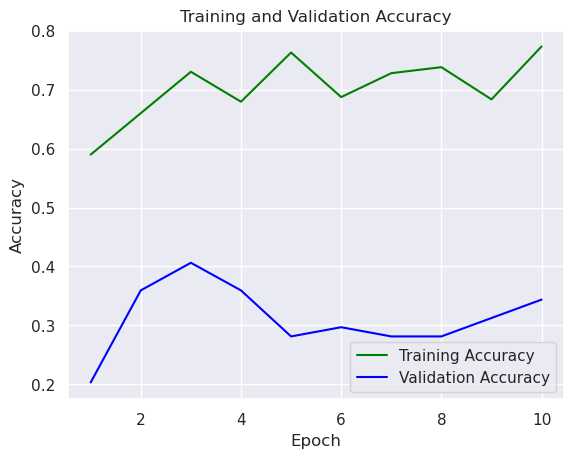

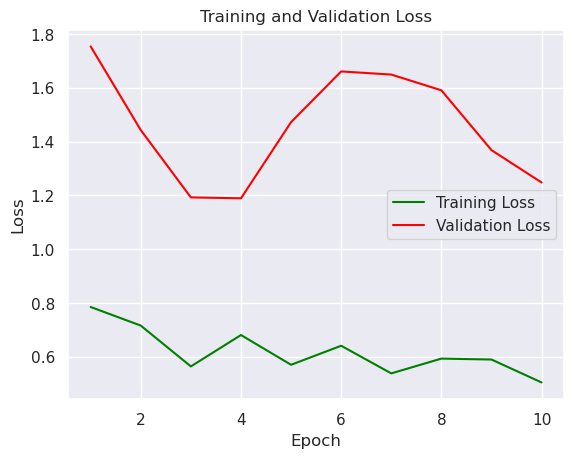

In [27]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
predictions = model.predict(test_generator)


2/2 [==============================] - 13s 6s/step


In [29]:
predictions[0:5]

array([[0.3400445 ],
       [0.05015121],
       [0.44493353],
       [0.7894119 ],
       [0.8767655 ]], dtype=float32)

In [30]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<AxesSubplot:>

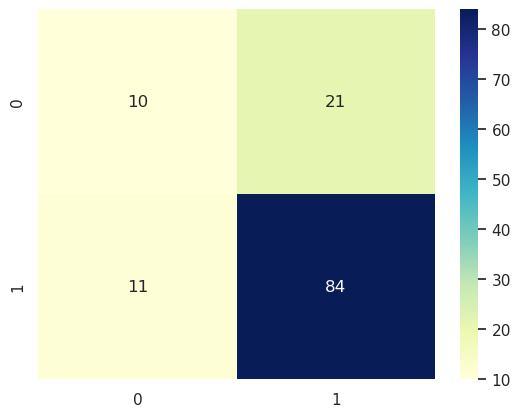

In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predictions.round())

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

# Model Evaluation

In [32]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, predictions.round())) #.argmax(axis=-1)

              precision    recall  f1-score   support

           0       0.48      0.32      0.38        31
           1       0.80      0.88      0.84        95

    accuracy                           0.75       126
   macro avg       0.64      0.60      0.61       126
weighted avg       0.72      0.75      0.73       126



In [33]:
from tensorflow.keras.preprocessing import image

# Model Prediction

In [34]:
img=plt.imread('../input/dataset/test/OSCC/OSCC_100x_101.jpg')
img.shape

(1536, 2048, 3)

In [35]:
img=cv2.resize(img,(64,64))

In [36]:
img.shape

(64, 64, 3)

In [37]:
image = np.expand_dims(img,axis=0) 

In [38]:
image.shape

(1, 64, 64, 3)

In [39]:
ypred = model.predict(image)

1/1 [==============================] - 1s 823ms/step


'Squamous Cell Carcinoma'

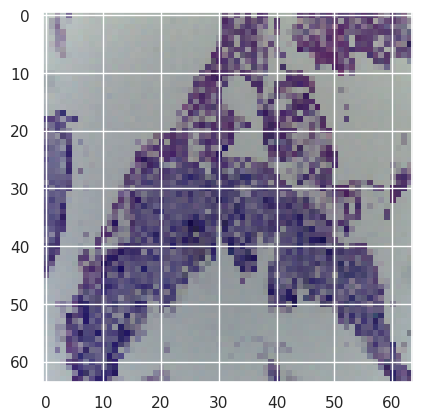

In [40]:
if ypred<0.5:
      ypred="Normal"
else:
      ypred="Squamous Cell Carcinoma" 
plt.imshow(img)
ypred

In [41]:
!pip install -q gradio torch torchvision

In [42]:
import gradio as gr
import torch
import requests
from torchvision import transforms

In [ ]:
labels = ['Normal', 'Squamous Cell Carcinoma']

def predict(inp):
    img = inp[0]
    if len(img.shape) == 2:
        # convert grayscale image to RGB image
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img_resized = cv2.resize(img, (64, 64))
    img_resized = img_resized.reshape(1, 64, 64, 3)
    prediction = model.predict(img_resized)
    confidences = {labels[i]: float(prediction[0][i]) for i in range(2)}    
    return confidences


demo = gr.Interface(fn=predict, 
             inputs=gr.inputs.Image(shape=(64,64)),
             outputs= gr.outputs.Label(num_top_classes=2),
             )
             
demo.launch(debug=True)

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:258: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:198: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://ce26a977e6726a9f05.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
